# KNN for Classification
## Instructions
Write and test your own k-nearest neighbors (KNN) classifier which takes as input:
- training data `X_train` 
- with known labels `y_train`, 
- unlabeled new data `X_test`, and 
- the number of neighbors `k`. 

Predicted the label based on the average value of K-Nearest Neighbors.

## Imports

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

from utils.knn import KNN
from utils.metrics import accuracy
from utils.plotting import plot_boundary, subplot_boundary

In [2]:
### Settings
np.random.seed(0)
pd.set_option("display.float_format", "{:.3f}".format)

In [3]:
### Generating Data
X, y = make_classification(n_samples=100,      # 100 samples
                           n_features=2,       # 2 features
                           n_redundant=0,      # No redundant features - all features are informative
                           n_informative=2,    # 2 informative features - all features are informative
                           random_state=3)     # Random state for reproducibility

### Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# Euclidean Distances with Broadcasting

The key feature of any KNN model is an efficient way to calculate distances. The Euclidean distance between two points $ x_1 $ and $ x_2 $ in $ d $-dimensional space is given by:
$$
d(x_1, x_2) = \sqrt{\sum_{i=1}^{d} (x_{1i} - x_{2i})^2}
$$
An effective method to store the distances from all samples in a data set `X_train` to all samples of a different data set `X_test` is a distance matrix of the shape `(n_X_test, n_X_train)` where `X_train` is of the shape `(n_X_train, d)` and `X_test` is of the shape `(n_X_test, d)`.

By broadcasting in an additional dimension the distance matrix of two 2D NumPy arrays can be computed efficiently:

In [4]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("difference.shape:", (X_test[:, np.newaxis,:] - X_train[np.newaxis,:, :]).shape)
print("distance_matrix.shape:", ((X_test[:, np.newaxis,:] - X_train[np.newaxis,:, :])**2).sum(axis=2).shape)


X_train.shape: (75, 2)
X_test.shape: (25, 2)
difference.shape: (25, 75, 2)
distance_matrix.shape: (25, 75)


# Simple use case

In [5]:
### Instantiate custom KNN Classifier
knn_clf = KNN(k = 3)

### Fit and Predict test labels
knn_clf.fit(X_train, y_train)

### Predict test labels
y_pred = knn_clf.predict(X_test)

### Calculate accuracy
print(f'Test accuracy: {accuracy(y_test, y_pred)}')

Test accuracy: 0.76


# Decision Boundaries
For data sets with 2 features decision boundaries can be visualized using `utils.plotting.plot_boundary`.  

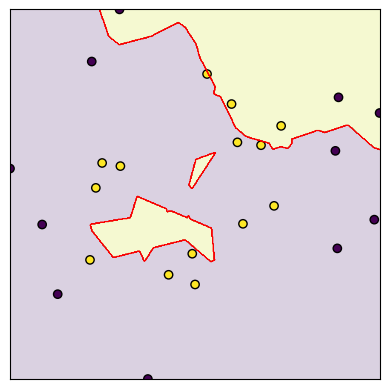

In [13]:
plot_boundary(X_test, y_test, knn_clf)
plt.show()

`utils.plotting.subplot_boundary` can be utilized to create subplots. The cell below shows the separation of three different data sets with different `k`. 

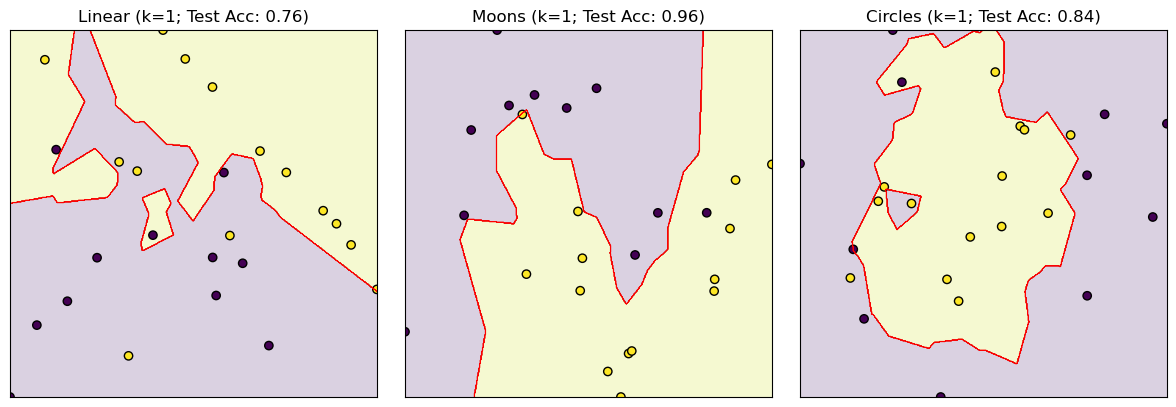

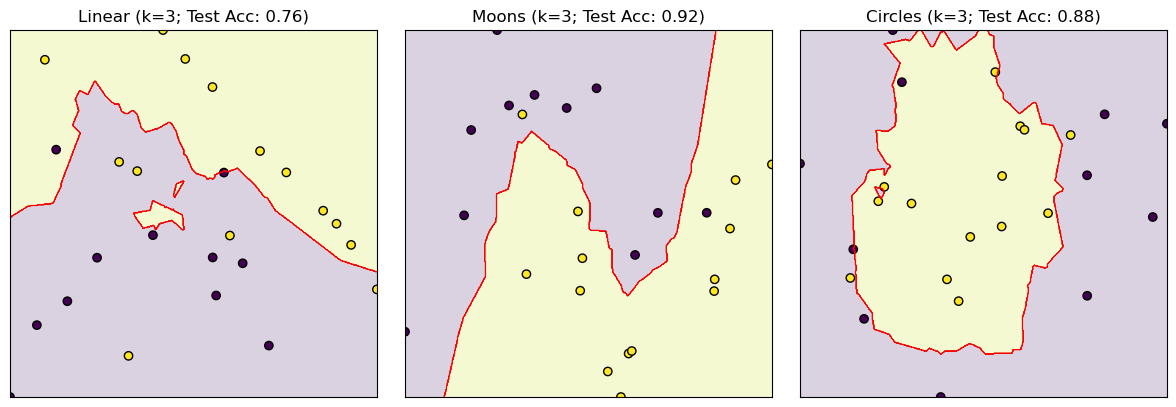

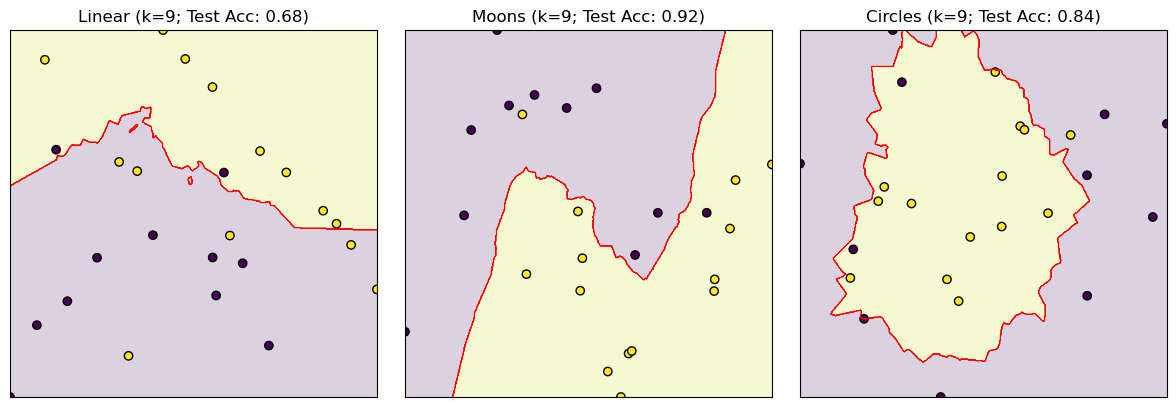

In [16]:
### Data for plotting
# --- 1. Linear Dataset ---
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                         n_informative=2, random_state=3)

# --- 2. Moons Dataset (Non-linear) ---
X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=3)

# --- 3. Circles Dataset (Non-linear) ---
X_circles, y_circles = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=3)

# --- Splitting each dataset into Train & Test ---
datasets = {
    "Linear": train_test_split(X_linear, y_linear, test_size=0.25, random_state=3),
    "Moons": train_test_split(X_moons, y_moons, test_size=0.25, random_state=3),
    "Circles": train_test_split(X_circles, y_circles, test_size=0.25, random_state=3)
}

# Unpacking
(X_train_linear, X_test_linear, y_train_linear, y_test_linear) = datasets["Linear"]
(X_train_moons, X_test_moons, y_train_moons, y_test_moons) = datasets["Moons"]
(X_train_circles, X_test_circles, y_train_circles, y_test_circles) = datasets["Circles"]



k_values = [1, 3, 9]
titles = ["Linear", "Moons", "Circles"]

for k in k_values:
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Create a single row with 3 columns

    # Loop over datasets and subplots
    for ax, (dataset_name, (X_train, X_test, y_train, y_test)), title in zip(axes, datasets.items(), titles):
        # Train KNN on the dataset
        knn = KNN(k=k)
        knn.fit(X_train, y_train)

        # Plot decision boundary in the corresponding subplot
        subplot_boundary(ax, X_test, y_test, knn)
        ax.set_title(f'{title} (k={k}; Test Acc: {accuracy(y_test, knn.predict(X_test)):.2f})')

    plt.tight_layout()
    plt.show()


# Conclusion
A KNN classifier was implemented following the syntax of scikit-learn. Decision boundaries can be visualized using the functions in `utils.plotting`. 